<a href="https://colab.research.google.com/github/jeyanthi492/ML-projects/blob/main/Heart%20disease%20prediction/Heart%20disease%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 17 - Heart Disease Prediction using Naive Bayes Classifier - IDLE

In [ ]:
#Integrating with HTML,CSS
#Supervised learning
#Classification
# Data analysis with Many charts

#Todo
"""
UI do using HTML,CSS
Static folder -  Images   background-image: url("static/image/background.gif");
Template folder - HTML file,css file

text boxes create to get input
model.pkl - trained model file

"""
import pickle
pickle.dump(model,open('model.pkl','wb'))  #No need to use training code each time - .pkl file will we generated(model's intelligence)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #visualization
from sklearn.naive_bayes import GaussianNB #algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #performance find
from sklearn.preprocessing import LabelEncoder #convert categorical data to numerical data
import seaborn as sns  # Data visualization
import warnings
warnings.filterwarnings('ignore') ##old versions warning ignore

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Heart_Disease_Prediction-changedversion.csv to Heart_Disease_Prediction-changedversion (1).csv


In [ ]:
df = pd.read_csv('Heart_Disease_Prediction-changedversion.csv')
print(df.head())

   Age Sex Chestpaintype   BP  Cholesterol  FBSover120  EKGresults  MaxHR  \
0   70   F           ASY  130          322           0           2    109   
1   67   M           NAP  115          564           0           2    160   
2   57   F           ATA  124          261           0           0    141   
3   64   F           ASY  128          263           0           0    105   
4   74   M           ATA  120          269           0           2    121   

   Exercise_angina  ST_depression  Slope_of_ST  Number_of_vessels_fluro  \
0                0            2.4            2                        3   
1                0            1.6            2                        0   
2                0            0.3            1                        0   
3                1            0.2            2                        1   
4                1            0.2            1                        1   

   Thallium  HeartDisease  
0         3             1  
1         7             0  
2 

[150 120]


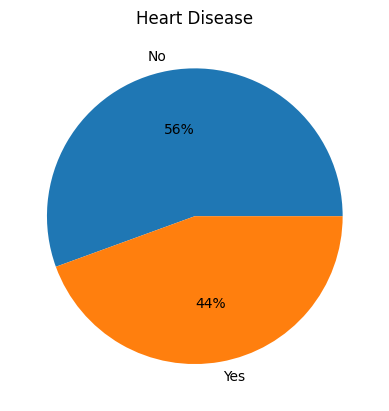

In [ ]:
#Pie chart - percentage of positive and negative heart disease
labels = ['No', 'Yes']
values = df['HeartDisease'].value_counts().values
print(values)  #[150 120] - 150No0,120yes1
plt.pie(values, labels=labels, autopct='%1.0f%%') #autopct means - output in percentage
plt.title('Heart Disease')
plt.show()

[129  79  42  20]


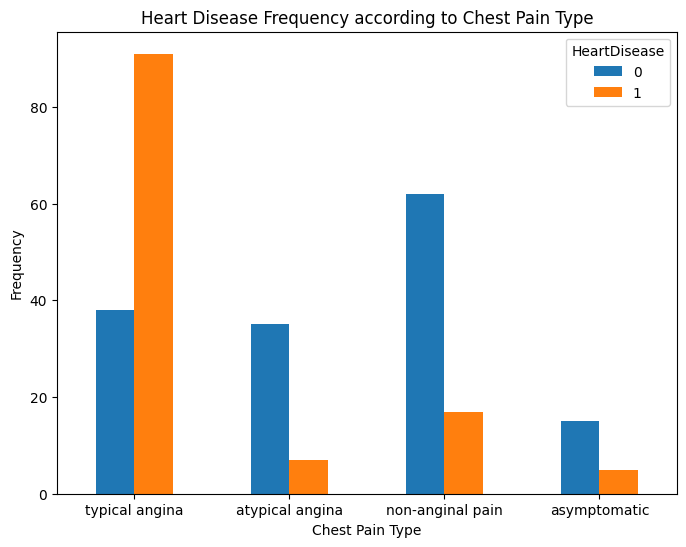

In [ ]:
#wrong output
#Disply chest pain type based on the heart disease - Analyse the data
values = df['Chestpaintype'].value_counts().values
print(values)  #[129  79  42  20]  ASY-129(38-0,91-1),ATA-42(35-0,7-1),NAP-79(62-0,17-1),TA-20(15-0,5-1)
pd.crosstab(df.Chestpaintype,df.HeartDisease).plot(kind="bar", figsize=(8,6))
plt.title('Heart Disease Frequency according to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4),('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Get min, max and average of the age
print('Min age: ', min(df['Age']))
print('Max age: ', max(df['Age']))

Min age:  29
Max age:  77


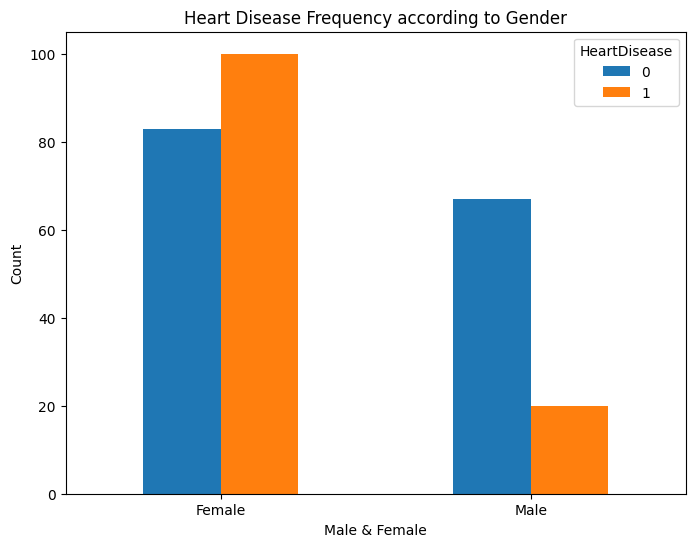

In [ ]:
#Display heart disease according to gender
pd.crosstab(df.Sex,df.HeartDisease).plot(kind="bar", figsize=(8,6))
plt.title('Heart Disease Frequency according to Gender')
plt.xlabel('Male & Female')
plt.xticks(np.arange(2),('Female','Male'), rotation = 0)
plt.ylabel('Count')
plt.show()

#Male - 20yes,67No
#Female - 100yes, 83No

[137 131   2]


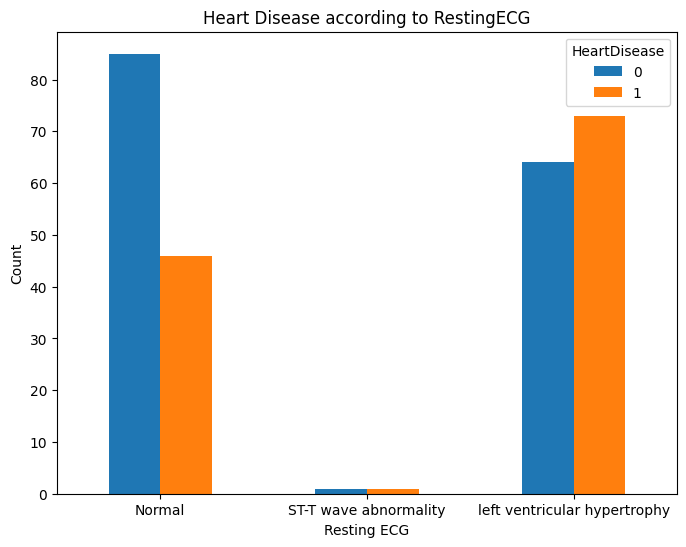

In [ ]:
#Display heart disease according to RestingECG - EKGresults
values = df['EKGresults'].value_counts().values  #137-2,131-0,2-1
pd.crosstab(df.EKGresults,df.HeartDisease).plot(kind="bar", figsize=(8,6))
print(values)
plt.title('Heart Disease according to RestingECG') #Electrocardiogram
plt.xlabel('Resting ECG')
plt.xticks(np.arange(3),('Normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'), rotation = 0)
plt.ylabel('Count')
plt.show()

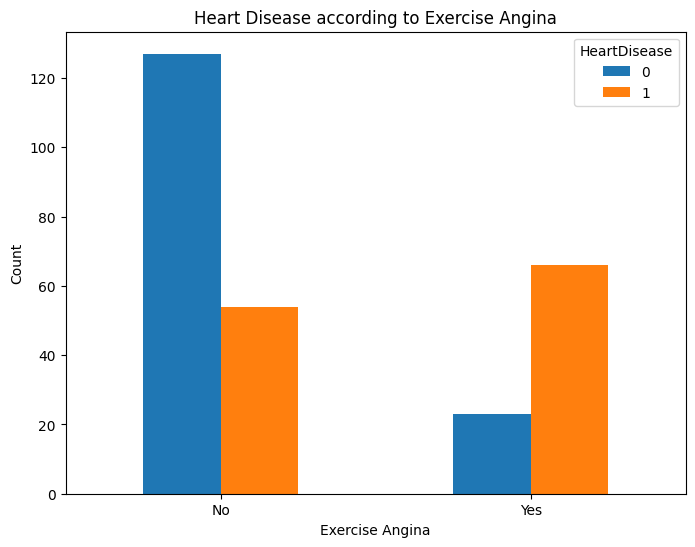

In [ ]:
# Display heart disease according to Excersise Angina
pd.crosstab(df.Exercise_angina,df.HeartDisease).plot(kind="bar", figsize=(8,6))
plt.title('Heart Disease according to Exercise Angina')
plt.xlabel('Exercise Angina')
plt.xticks(np.arange(2),('No', 'Yes'), rotation = 0)
plt.ylabel('Count')
plt.show()

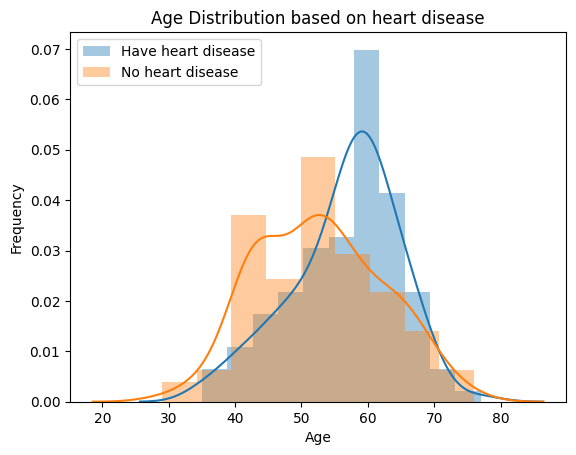

In [ ]:
#display age distribution based on heart disease
sns.distplot(df[df['HeartDisease']==1]['Age'],label='Have heart disease') #displot also can be used
sns.distplot(df[df['HeartDisease']==0]['Age'],label='No heart disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution based on heart disease')
plt.legend()
plt.show()

In [ ]:
print('min age of people who do not have heart disease: ',min(df[df['HeartDisease']==0]['Age']))
print('max age of people who do not have heart disease: ',max(df[df['HeartDisease']==0]['Age']))

min age of people who do not have heart disease:  29
max age of people who do not have heart disease:  76


In [ ]:
print(df.head())
le = LabelEncoder() # mostly we do in categorical data only/ no need to do in numerical data
df['Age']= le.fit_transform(df['Age']) # for feature scaling for accuracy increase, it is number only, no need to do. even if you did, there will be no major changes
df['Sex'] = le.fit_transform(df['Sex']) # replace with Female as 0, Male as 1
df['Chestpaintype'] = le.fit_transform(df['Chestpaintype'])
#df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['Exercise_angina'] = le.fit_transform(df['Exercise_angina'])


   Age Sex Chestpaintype   BP  Cholesterol  FBSover120  EKGresults  MaxHR  \
0   70   F           ASY  130          322           0           2    109   
1   67   M           NAP  115          564           0           2    160   
2   57   F           ATA  124          261           0           0    141   
3   64   F           ASY  128          263           0           0    105   
4   74   M           ATA  120          269           0           2    121   

   Exercise_angina  ST_depression  Slope_of_ST  Number_of_vessels_fluro  \
0                0            2.4            2                        3   
1                0            1.6            2                        0   
2                0            0.3            1                        0   
3                1            0.2            2                        1   
4                1            0.2            1                        1   

   Thallium  HeartDisease  
0         3             1  
1         7             0  
2 

In [ ]:
print(df.head())

   Age  Sex  Chestpaintype   BP  Cholesterol  FBSover120  EKGresults  MaxHR  \
0   36    0              0  130          322           0           2    109   
1   33    1              2  115          564           0           2    160   
2   23    0              1  124          261           0           0    141   
3   30    0              0  128          263           0           0    105   
4   38    1              1  120          269           0           2    121   

   Exercise_angina  ST_depression  Slope_of_ST  Number_of_vessels_fluro  \
0                0            2.4            2                        3   
1                0            1.6            2                        0   
2                0            0.3            1                        0   
3                1            0.2            2                        1   
4                1            0.2            1                        1   

   Thallium  HeartDisease  
0         3             1  
1         7       

In [ ]:
x=df.drop(columns = ['HeartDisease'])
y=df['HeartDisease']
print(x)
print(y)

     Age  Sex  Chestpaintype   BP  Cholesterol  FBSover120  EKGresults  MaxHR  \
0     36    0              0  130          322           0           2    109   
1     33    1              2  115          564           0           2    160   
2     23    0              1  124          261           0           0    141   
3     30    0              0  128          263           0           0    105   
4     38    1              1  120          269           0           2    121   
..   ...  ...            ...  ...          ...         ...         ...    ...   
265   18    0              2  172          199           1           0    162   
266   10    0              1  120          263           0           0    173   
267   22    1              1  140          294           0           2    153   
268   23    0              0  140          192           0           0    148   
269   33    0              0  160          286           0           2    108   

     Exercise_angina  ST_de

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(216, 13)
(54, 13)
(216,)
(54,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(y_pred)

[0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score # can't decide the model based on accuracy for imbalanced data
print(accuracy_score(y_test,y_pred))

0.7592592592592593


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
print("Confusion Matrix", confusion_matrix(y_test,y_pred))
print("Precision Score", precision_score(y_test,y_pred))
print("Recall Score", recall_score(y_test,y_pred))
print("F1 Score", f1_score(y_test,y_pred)) #High for good model - Based on precision & recall

Confusion Matrix [[22  4]
 [ 9 19]]
Precision Score 0.8260869565217391
Recall Score 0.6785714285714286
F1 Score 0.7450980392156864


In [ ]:
testPrediction = model.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
if testPrediction == 1:
  print("Heart Disease")
else:
  print("No Heart Disease")
#

No Heart Disease


In [ ]:
#Code with HTML,CSS
from flask import Flask, render_template, request
import pickle

app = Flask(__name__)
model = pickle.load(open('model.pkl','rb')) #rb-read binary

@app.route('/')  #link generate
def home():
  return render_template('index.html') # render template - to call the files

@app.route('/predict', methods=['POST'])  #run this function when predict called
#In hTML - mention /predict in submit button
#<form action = "((url_for('predict')))" method = "post" class = "form-inline">
#<button type = "submit" class = "btn btn-primary btn-lg"> Submit</button>
def predict():
  input_features = [float(x) for x in request.form.values()]  #form values will be requested and the values are taken
  features_value = [np.array(input_features)]  #change as array

  output = model.predict(features_value)

  if output == 1:
    res_val = "The patient Have Heart Disease, please consult the Doctor"
  else:
    res_val = "No Heart Disease - The patient is Normal"

  return render_template('index.html', prediction_text='Result - {}'.format(res_val))

  if __name__ == "__main__":
    app.run()
    #app.run(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'